<a href="https://colab.research.google.com/github/SaadARazzaq/Logistic-Regression/blob/main/src.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**

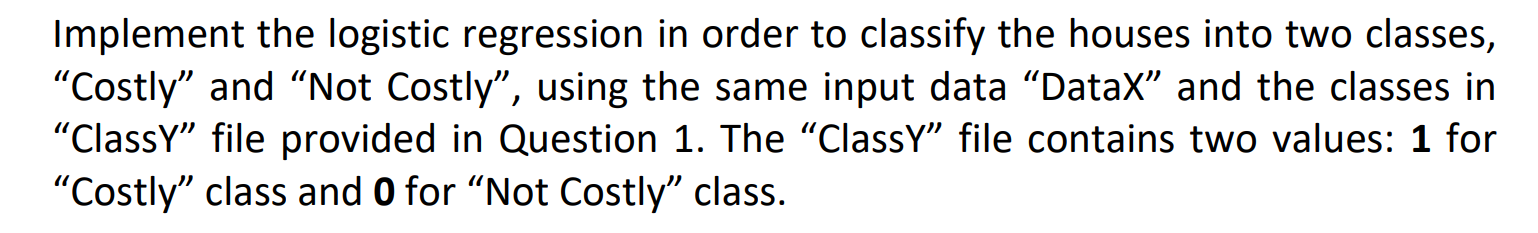

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read 'DataX.dat' and 'DataY.dat' files with whitespace (space or tab) as delimiter, without assuming headers.
X = pd.read_csv('DataX.dat', sep='\s+', header=None)
Y = pd.read_csv('ClassY.dat')

In [4]:
X.head()

,0,1,2
0,2104.0,3.0,2.0
1,1600.0,3.0,2.0
2,2400.0,3.0,2.0
3,1416.0,2.0,1.0
4,3000.0,4.0,3.0


In [5]:
Y.head()

,1
0,1
1,1
2,0
3,1
4,0


In [6]:
print("Total Training examples of X are: ", len(X))
print("Total Training examples of Y are: ", len(Y))

Total Training examples of X are:  50
Total Training examples of Y are:  49


In [7]:
# Remove the last row (last sample) from the X DataFrame
X = X.iloc[:-1]

In [8]:
print("Total Training examples of X are: ", len(X))
print("Total Training examples of Y are: ", len(Y))

Total Training examples of X are:  49
Total Training examples of Y are:  49


In [9]:
X[3] = 1 # Add a third column with all values = 1

In [10]:
X = X[[3, 0, 1, 2]]  # Rearranging the columns

In [11]:
X.columns = ['x_0', 'x_1', 'x_2', 'x_3']  # Renaming the columns

In [12]:
Y.columns = ['y_0'] # Renaming the columns

In [13]:
print(X.columns)
print(Y.columns)
print("--------------------------------")
print(X.head(5))
print("--------------------------------")
print(Y.head(5))
print("--------------------------------")

Index(['x_0', 'x_1', 'x_2', 'x_3'], dtype='object')
Index(['y_0'], dtype='object')
--------------------------------
   x_0     x_1  x_2  x_3
0    1  2104.0  3.0  2.0
1    1  1600.0  3.0  2.0
2    1  2400.0  3.0  2.0
3    1  1416.0  2.0  1.0
4    1  3000.0  4.0  3.0
--------------------------------
   y_0
0    1
1    1
2    0
3    1
4    0
--------------------------------


In [14]:
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

Shape of X: (49, 4)
Shape of Y: (49, 1)


In [15]:
# Changing to vectors/feature matrix

X_train = X.values
Y_train = Y.values

In [16]:
print(X_train)
print("--------------------------------")
print(Y_train)
print("--------------------------------")

[[1.000e+00 2.104e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.600e+03 3.000e+00 2.000e+00]
 [1.000e+00 2.400e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.416e+03 2.000e+00 1.000e+00]
 [1.000e+00 3.000e+03 4.000e+00 3.000e+00]
 [1.000e+00 1.985e+03 4.000e+00 3.000e+00]
 [1.000e+00 1.534e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.427e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.380e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.494e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.940e+03 4.000e+00 3.000e+00]
 [1.000e+00 2.000e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.890e+03 3.000e+00 2.000e+00]
 [1.000e+00 4.478e+03 5.000e+00 3.000e+00]
 [1.000e+00 1.268e+03 3.000e+00 2.000e+00]
 [1.000e+00 2.300e+03 4.000e+00 3.000e+00]
 [1.000e+00 1.320e+03 2.000e+00 1.000e+00]
 [1.000e+00 1.236e+03 3.000e+00 2.000e+00]
 [1.000e+00 2.609e+03 4.000e+00 3.000e+00]
 [1.000e+00 3.031e+03 4.000e+00 3.000e+00]
 [1.000e+00 1.767e+03 3.000e+00 2.000e+00]
 [1.000e+00 1.888e+03 2.000e+00 1.000e+00]
 [1.000e+00 1.604e+03 3.000e+00 2.000e+00]
 [1.000e+00

## **Feature Scaling**

In [17]:
for i in range(5):
    mean_x1 = np.mean(X_train[:, 1])
    std_x1 = np.std(X_train[:, 1])
    X_train[:, 1] = (X_train[:, 1] - mean_x1) / (std_x1)

for i in range(5):
    mean_x2 = np.mean(X_train[:, 2])
    std_x2 = np.std(X_train[:, 2])
    X_train[:, 2] = (X_train[:, 2] - mean_x2) / (std_x2)

for i in range(5):
    mean_x3 = np.mean(X_train[:, 3])
    std_x3 = np.std(X_train[:, 3])
    X_train[:, 3] = (X_train[:, 3] - mean_x3) / (std_x3)

In [18]:
print(f"Values of normalized x_0 are: {np.min(X_train[0])} <= x_0 <= {np.max(X_train[0])}")
print(f"Values of normalized x_1 are: {np.min(X_train[1])} <= x_1 <= {np.max(X_train[1])}")
print(f"Values of normalized x_2 are: {np.min(X_train[2])} <= x_2 <= {np.max(X_train[2])}")
print(f"Values of normalized x_3 are: {np.min(X_train[3])} <= x_3 <= {np.max(X_train[3])}")

Values of normalized x_0 are: -0.25122971720853104 <= x_0 <= 1.0
Values of normalized x_1 are: -0.4944935530779656 <= x_1 <= 1.0
Values of normalized x_2 are: -0.25122971720853104 <= x_2 <= 1.0
Values of normalized x_3 are: -1.790011735110784 <= x_3 <= 1.0


In [19]:
# Reshaping

X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")

Shape of X_train: (4, 49)
Shape of Y_train: (1, 49)


## **Here is the formulas we will be using**

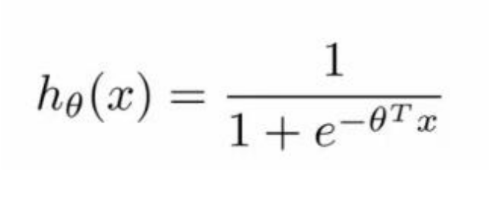

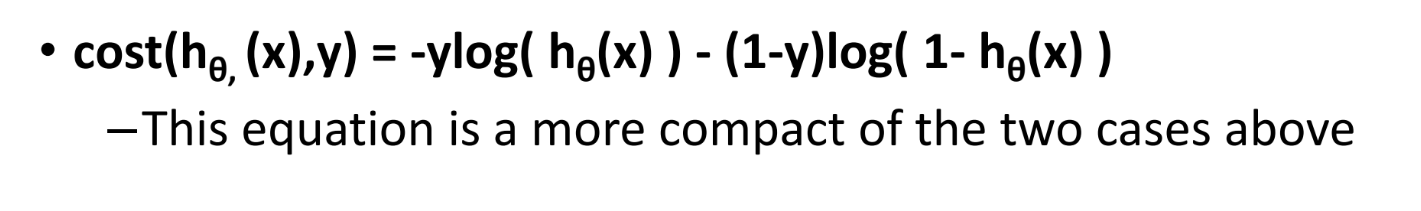

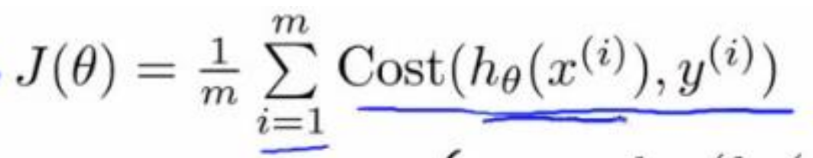

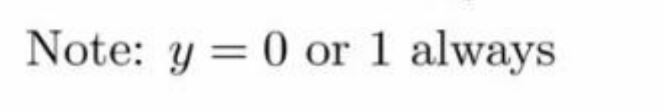

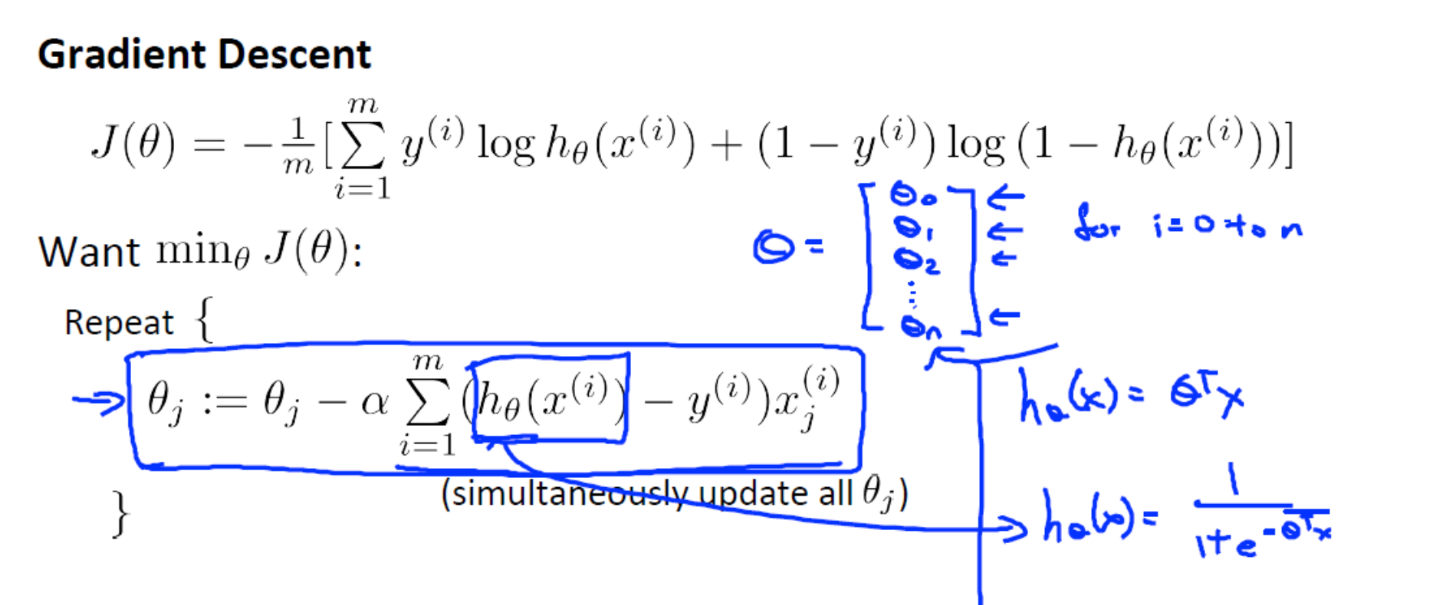

In [20]:
# First we implement the sigmoid function

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [21]:
def training_model(X, y, alpha, total_iterations):
    m = X.shape[1]
    n = X.shape[0]

    # Initialize theta with zeros
    theta = np.zeros((n, 1))

    cost_list = []
    for i in range(total_iterations):
        Z = np.dot(theta.T, X)
        predicted = sigmoid(Z)

        cost = (-1/m) * np.sum(y*np.log(predicted) + (1-y)*np.log(1-predicted))

        # Compute the gradient
        gradient = (1/m) * np.dot(X, (predicted - y).T)

        theta = theta - alpha * gradient

        cost_list.append(cost)

        if i % (total_iterations // 10) == 0:
            print(f"Cost after {i} iterations is {cost}")

    return theta, cost_list


In [22]:
iterations = 10000000
theta, costs = training_model(X_train, Y_train, 0.00002, iterations)

Cost after 0 iterations is 0.6931471805599453
Cost after 1000000 iterations is 0.6716537536718094
Cost after 2000000 iterations is 0.6650165434368666
Cost after 3000000 iterations is 0.6601006730235618
Cost after 4000000 iterations is 0.6564083100736954
Cost after 5000000 iterations is 0.6535950954771987
Cost after 6000000 iterations is 0.6514180442369641
Cost after 7000000 iterations is 0.6497065648189989
Cost after 8000000 iterations is 0.6483404434276148
Cost after 9000000 iterations is 0.6472342152343314


# **Plotting**

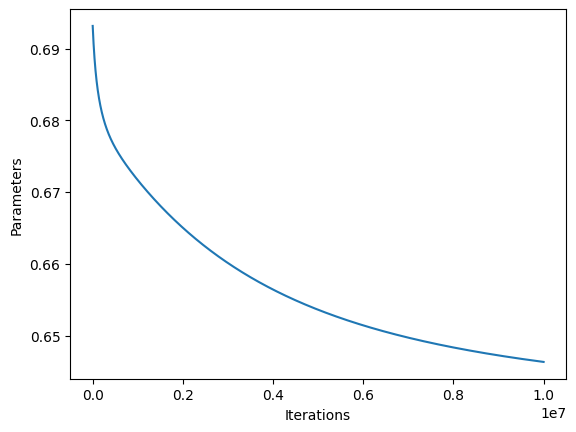

In [23]:
plt.plot(np.arange(iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Parameters')
plt.show()

## Here on the x axis if cost and not the parameters. Correction